# Justin Verlander Pitching Analysis

**Created by:**&emsp;**Jacob Norman**  
**Date:**&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&nbsp;**4/25/2019**

## Overview

This my final project for an independent study course taken at Oakland University, in Rochester, MI. It was based primarily on Jake VanderPlas' text *Python Data Science Handbook*, with this assignment representing the culmination of everything I have learned. This will mainly take the form of exploratory data analysis (EDA) using ``pandas`` and ``seaborn``.

### About the Data

The data used for this assignment is pitch-by-pitch data for Justin Verlander (JV) for the entire 2016 MLB season. I chose Justin Verlander because I am a Detroit native and fan of the Tigers. On [August 25, 2015](https://www.baseball-reference.com/boxes/DET/DET201508260.shtml), I was lucky enough to attend a game where JV had a no-hitter going into the 9th inning against the Los Angeles Angels of Anaheim. Chris Ianetta broke up the no-hit bid with a line drive double to leadoff the inning. That would be the only hit of the inning, and the game, for the Angels. It is my most cherished live sports memory to date.

I did [a similar analysis for JV's 2017 regular and postseason](https://github.com/jwnorm/ind_study-hw_2/blob/master/hw_2.ipynb) to examine his performance during a crucial year in his career. That was the season he was traded from the Detroit Tigers to the Houston Astros. The Los Angeles Dodgers were considered the destined landing spot for JV for most of the season, but they opted for the younger and contractually cheaper Yu Darvish to bolster their starting rotation instead. These late-season additions were arguably the difference makers in deciding the ultimate World Series winner. JV was a key piece in Houston's success late in the regular season and throughout the postseason, while Darvish famously imploded during two games of the World Series, recording a [21.60 ERA](https://www.baseball-reference.com/players/d/darviyu01.shtml#all_pitching_postseason). JV finally became a World Series champion, and his very public dominence resulted in his return to greatness in the minds of baseball fans and analysts alike. 

Interestingly, JV's performance during the 2016 season was similarly dominant. He was the [runner-up](https://www.baseball-reference.com/awards/awards_2016.shtml#ALcya) in the AL Cy Young race, behind former Tiger Rick Porcello, and finished 17th overall in AL MVP voting. Was there a reason that his year was so understated? Maybe it was because the Tigers were not playoff bound, or maybe it was because his win-loss record, [16-9](https://www.baseball-reference.com/players/v/verlaju01.shtml), was not as flashy as Porcello's, [22-4](https://www.baseball-reference.com/players/p/porceri01.shtml). This project seeks to answer these questions through a deep dive into JV's 2016 season.

### ``pybaseball`` Introduction

PITCHf/x is a relatively new tool used for Sabermetrics. Starting in 2006, PITCHf/x has recorded pitch-level data for individual players. The earlier years of the application are not as complete, with many missing values or even entire columns. Starting in 2015, Statcast was installed in all 30 baseball parks and replaced PITCHf/x. It records more robust data, and is therefore more suitable for this analysis. ``pybaseball`` is a way to extract Statcast and other baseball data directly into Python. You can read about the functions of the package [here](https://www.pydoc.io/pypi/pybaseball-1.0.1/). There are many R packages, such as ``baseballr``, ``Lahman``, and ``pitchRx`` that do a better job, but, as this is a Python class, I opted for the slightly less feature-rich ``pybaseball``. 

Here is a way to install the package, if you wish:

In [1]:
# !pip install pybaseball

We begin with the standard imports:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set(style = 'whitegrid')
import pybaseball

In [3]:
player_id = pybaseball.playerid_lookup('Verlander', first = 'Justin')
jv_id = player_id['key_mlbam'][0]
jv = pybaseball.statcast_pitcher(start_dt = '2016-04-05', end_dt = '2016-10-02', player_id = jv_id)
jv.head(10)

Gathering player lookup table. This may take a moment.
Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,FF,2016-10-02,94.5,-2.0258,6.4147,Justin Verlander,605480,434378,strikeout,swinging_strike,...,1,0,1,0,0,1,1,0,Standard,Standard
1,CU,2016-10-02,81.3,-2.2877,6.3762,Justin Verlander,605480,434378,NaN,swinging_strike,...,1,0,1,0,0,1,1,0,Strategic,Standard
2,FF,2016-10-02,94.5,-2.0649,6.2979,Justin Verlander,605480,434378,NaN,ball,...,1,0,1,0,0,1,1,0,Strategic,Standard
3,CU,2016-10-02,79.7,-2.3493,6.2367,Justin Verlander,605480,434378,NaN,called_strike,...,1,0,1,0,0,1,1,0,Strategic,Standard
4,SL,2016-10-02,90.2,-2.0345,6.2825,Justin Verlander,621020,434378,field_out,hit_into_play,...,1,0,1,0,0,1,1,0,Standard,Standard
5,CU,2016-10-02,81.6,-2.2588,6.3351,Justin Verlander,621020,434378,NaN,foul,...,1,0,1,0,0,1,1,0,Standard,Standard
6,FF,2016-10-02,94.9,-1.9834,6.4984,Justin Verlander,621020,434378,NaN,foul,...,1,0,1,0,0,1,1,0,Standard,Standard
7,SL,2016-10-02,89.7,-2.2557,6.4455,Justin Verlander,621020,434378,NaN,swinging_strike,...,1,0,1,0,0,1,1,0,Standard,Standard
8,SL,2016-10-02,90.1,-2.2059,6.4394,Justin Verlander,621020,434378,NaN,ball,...,1,0,1,0,0,1,1,0,Standard,Standard
9,CU,2016-10-02,80.8,-2.2629,6.2909,Justin Verlander,607054,434378,field_out,hit_into_play,...,1,0,1,0,0,1,1,0,Standard,Standard


The data is clearly loaded with variables to analyze (**89**!). With this many columns, perhaps it would be better to view the overall structure of the dataframe instead.

In [4]:
jv.game_date = pd.to_datetime(jv.game_date)
jv.zone = jv.zone.astype('object')
jv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668 entries, 0 to 3667
Data columns (total 89 columns):
pitch_type                         3668 non-null object
game_date                          3668 non-null datetime64[ns]
release_speed                      3668 non-null float64
release_pos_x                      3662 non-null float64
release_pos_z                      3662 non-null float64
player_name                        3668 non-null object
batter                             3668 non-null int64
pitcher                            3668 non-null int64
events                             908 non-null object
description                        3668 non-null object
spin_dir                           0 non-null float64
spin_rate_deprecated               0 non-null float64
break_angle_deprecated             0 non-null float64
break_length_deprecated            0 non-null float64
zone                               3668 non-null object
des                                908 non-null objec

Clearly the previous view of the dataframe did not do it justice. These are all of the variables available for all  3,668 pitches JV threw in 2016. Exracting this data directly from [Baseball Savant](https://baseballsavant.mlb.com/statcast_search) or [Brook's Baseball](http://www.brooksbaseball.net/pfxVB/pfx.php?) would be a very tedious task, but ``pybaseball`` makes the process very quick and painless. There are some columns that contain all NaN values; however, it appears that this is because they were deprecated and are captured in a different variable. This is likely due to the transition from PITCHf/x to Statcast. [Here](http://www.johnedwardsstats.com/2018/05/the-complete-idiots-guide-to-playing.html) is an in-depth description of what each variable represents.

## EDA with ``pandas`` and ``seaborn``
The principal function of ``pandas`` is the group by analysis, similiar to ``dplyr`` in R. This allows for interesting views of the data that can lead to conclusions that cannot be drawn from simply looking at the individual observations. A possible group by would be by ``game_date``, essentially giving the stats for each of JV's starts or pitching appearances. For this assignment, I will be plotting using the ``seaborn`` API. This is mainly because the interface is somewhat easier to manipulate than ``matplotlib``, but ``matplotlib`` will still be required to fine-tune the plots.

Let's do a group by ``game_date``:

In [5]:
jv.groupby(['game_date']).mean().head(10)

,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,hit_location,...,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score
game_date,,,,,,,,,,,,,,,,,,,,,
2016-04-05,87.594898,-2.065600,6.599715,524075.193878,434378.0,NaN,NaN,NaN,NaN,5.050000,...,32.193878,3.153061,0.346939,4.244898,0.346939,4.244898,4.244898,0.346939,0.346939,4.244898
2016-04-11,88.335135,-2.077061,6.613939,475804.000000,434378.0,NaN,NaN,NaN,NaN,6.272727,...,18.936937,3.387387,0.504505,2.639640,2.639640,0.504505,2.639640,0.504505,2.639640,0.504505
2016-04-16,87.283962,-2.079859,6.686836,532945.245283,434378.0,NaN,NaN,NaN,NaN,4.238095,...,26.924528,2.962264,2.735849,1.198113,2.735849,1.198113,1.198113,2.735849,2.735849,1.198113
2016-04-22,89.034746,-2.119888,6.524336,485317.822034,434378.0,NaN,NaN,NaN,NaN,4.173913,...,21.389831,2.949153,0.093220,1.033898,1.033898,0.093220,1.033898,0.093220,1.033898,0.093220
2016-04-27,88.718627,-2.320809,6.469218,483394.147059,434378.0,NaN,NaN,NaN,NaN,4.956522,...,27.794118,2.784314,3.539216,0.431373,0.431373,3.539216,0.431373,3.539216,0.431373,3.539216
2016-05-03,87.973196,-2.369757,6.331715,507167.721649,434378.0,NaN,NaN,NaN,NaN,6.619048,...,23.000000,2.989691,2.907216,0.494845,2.907216,0.494845,0.494845,2.907216,2.907216,0.494845
2016-05-08,89.622523,-2.319522,6.504743,475415.054054,434378.0,NaN,NaN,NaN,NaN,4.416667,...,27.234234,2.945946,1.171171,0.000000,0.000000,1.171171,0.000000,1.171171,0.000000,1.171171
2016-05-13,88.768750,-2.306485,6.592489,508025.187500,434378.0,NaN,NaN,NaN,NaN,4.280000,...,32.437500,2.883929,0.276786,0.000000,0.276786,0.000000,0.000000,0.276786,0.276786,0.000000
2016-05-18,88.802679,-2.444315,6.423484,528819.928571,434378.0,NaN,NaN,NaN,NaN,4.857143,...,31.714286,2.758929,2.857143,0.125000,0.125000,2.857143,0.125000,2.857143,0.125000,2.857143


It's hard to discern a lot from this look. Most of the variables do not have a meaningful interpretation when they are grouped by the mean. Perhaps one of the few ones of note is mean ``release_speed``. Let's see what games JV threw the hardest on average.

In [6]:
jv.iloc[:,:3].groupby(['game_date']).mean().sort_values(by = 'release_speed', ascending = False).head(10)

,release_speed
game_date,
2016-09-05,92.524138
2016-09-11,92.329808
2016-05-30,91.507759
2016-09-17,91.317925
2016-07-25,91.255455
2016-05-24,91.096296
2016-08-31,91.012389
2016-06-26,90.970115
2016-08-10,90.952893


This is interesting. It is typical for pitchers, especially those over the age of 30, to throw slower as the season progresses. They get burned out or injured, or the long 162 game season just wears them down. In JV's case, he actually threw all of his hardest games after the All-Star break. In fact, more than half of his top 10 hardest throwing games were in the final 2 months of the season. This is very impressive, especially given the fact that many analysts, especially those in Detroit, considered him on the border of being washed up. Boy were they wrong. 

Let's looks at JV's strike zone for the entire 2016 season.

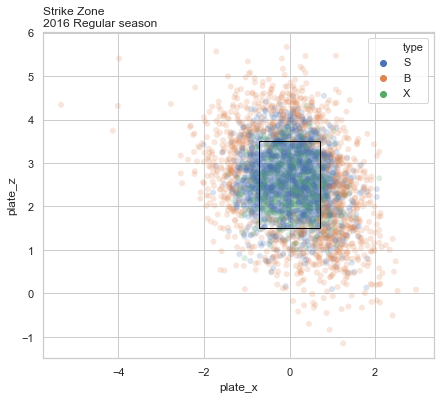

In [7]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x = 'plate_x', y = 'plate_z', hue = 'type', 
                data = jv, alpha = 0.2, linewidth = 0).add_patch(patches.Rectangle((-0.71,1.5),1.42,2, 
                                                                                    fill = False, edgecolor = 'black'))
plt.title('Strike Zone\n2016 Regular season', loc = 'left');

This is pretty messy. Even with the transparency, it is hard to see the strike zone. I researched the shape of the strike zone and it seems it is generally defined as the rectangle created by the point (-0.71, 1.5) with a width of 1.42 and a height of 2. The blue points are strikes, while the orange points are balls. The green points are designated "X", which is anything that is not a ball or strike, but is usually a ball in play. The reason that they are XZ coordinates and not XY is because this is a view of where the ball crosses the Y-plane, the batter's box. Additionally, it looks like some of the pitches here (upper left) are likely intential balls, so let's remove them from the analysis.

This is a great example of when Jake VanderPlas said that often times ``matplotlib`` is needed to augment ``seaborn`` to create the desired plot, especially if it is somewhat complex.

Let's try this same look except just for the month of September only.

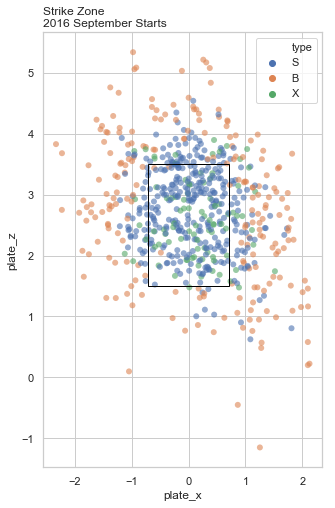

In [8]:
plt.figure(figsize=(5, 8))
sns.scatterplot(x = 'plate_x', y = 'plate_z', hue = 'type', 
                data = jv[(jv['game_date'] >= '2016-09-01') & (jv['pitch_type'] != 'IN') & (jv['pitch_type'] != 'PO')],
                alpha = 0.6, linewidth = 0).add_patch(patches.Rectangle((-0.71,1.5),1.42,2, 
                                                                                    fill = False, edgecolor = 'black'))
plt.title('Strike Zone\n2016 September Starts', loc = 'left');

This is more readible. The strike zone seems somewhat more obvious, although the human element of balls vs strikes is clearly still present (hence, why there should be an electronic strike zone!).  

Let's look at the relationship between pitch location and pitch type.

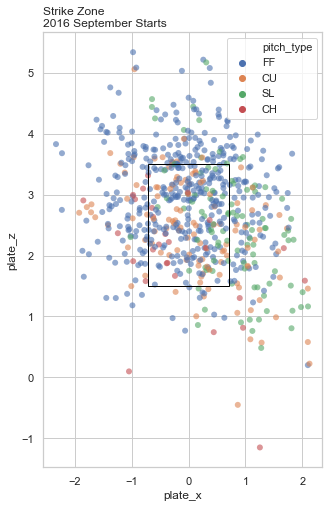

In [9]:
plt.figure(figsize=(5, 8))
sns.scatterplot(x = 'plate_x', y = 'plate_z', hue = 'pitch_type', 
                data = jv[(jv['game_date'] >= '2016-09-01') & (jv['pitch_type'] != 'IN') & (jv['pitch_type'] != 'PO')], 
                alpha = 0.6, linewidth = 0).add_patch(patches.Rectangle((-0.71,1.5),1.42,2, fill = False, edgecolor = 'black'))
plt.title('Strike Zone\n2016 September Starts', loc = 'left');

It appears JV likes to throw his slider (SL) low and away to RH batters and low and in on LH batters. His curveballs (CU) are all over the place, but they too are lower in the strike zone. Here is a zone chart for the strike zone:

![title](zones.png).  

Basic knowledge of baseball asserts that "hanging" breaking balls are often hammered for extra bases or home runs. Hanging breaking balls would be in the middle of the strike zone and above. Let's test this assumpton using group by analysis.

In [10]:
zone_df = jv.groupby(['pitch_type', 'zone']) \
                .agg({'iso_value':'sum', 'game_date':'count'}) \
                .rename(columns={'iso_value':'extra_bases','game_date':'pitches'}) \
                .reset_index()
       
zone_df['eb_per_pitch'] = zone_df['extra_bases'] / zone_df['pitches']
zone_df.sort_values('eb_per_pitch', ascending = False).head(10)

,pitch_type,zone,extra_bases,pitches,eb_per_pitch
4,CH,6,3.0,7,0.428571
39,SL,1,3.0,10,0.300000
2,CH,4,8.0,34,0.235294
43,SL,5,6.0,40,0.150000
6,CH,8,3.0,22,0.136364
18,CU,8,6.0,46,0.130435
5,CH,7,4.0,32,0.125000
31,FF,8,8.0,73,0.109589
3,CH,5,1.0,10,0.100000
29,FF,6,13.0,155,0.083871


This baseball intuition proves to be both correct and incorrect. It looks like JV gave up the most extra bases on four-seam fastballs (4SFB) in zone 6; however, he also threw considerably more pitches in that location than say, a changeup in zone 6. So a way to normalize this is extra bases per hit. Looking at this metric instead, we see that JV gave up the most extra bases per pitch on the changeup in zone 6. In fact, almost all of these pitches are breaking balls or offspeed pitches. What this tells me is that JV is hitting his targets. Let's see what the bottom of this list looks like.

In [11]:
zone_df.sort_values('eb_per_pitch', ascending = False).tail(10)

,pitch_type,zone,extra_bases,pitches,eb_per_pitch
17,CU,7,0.0,21,0.0
16,CU,6,0.0,32,0.0
13,CU,3,0.0,5,0.0
12,CU,2,0.0,25,0.0
11,CU,1,0.0,30,0.0
10,CH,14,0.0,62,0.0
9,CH,13,0.0,88,0.0
8,CH,11,0.0,30,0.0
7,CH,9,0.0,11,0.0
51,SL,14,0.0,244,0.0


Yep, as expected. Some of these pitches are a bit elevated for breaking balls, but the result is the same. He gave up no extra bases when he locates his offspeed stuff accordingly. Specifically, the slider in zone 14 is a perfectly placed pitch, running away from right-handed batters. He hit this location with this pitch **244** times. Very impressive stuff.  

Perhaps spin rate has something to do with it?

In [12]:
jv.groupby(['pitch_type']).mean().release_spin_rate.sort_values(ascending = False)

pitch_type
CU    2763.353571
FF    2558.475511
SL    2473.490415
PO    2255.000000
IN    2169.500000
CH    2058.622150
Name: release_spin_rate, dtype: float64

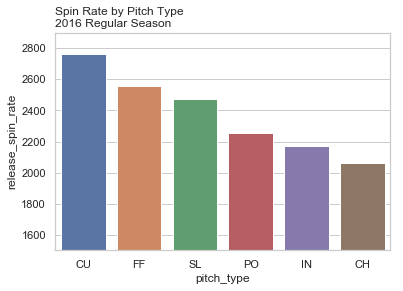

In [13]:
sns.barplot(x = jv.groupby(['pitch_type']).mean().release_spin_rate.sort_values(ascending = False).index, 
            y = 'release_spin_rate',
            data = jv.groupby(['pitch_type']).mean().sort_values(by = ['release_spin_rate'], ascending = False))
plt.title('Spin Rate by Pitch Type\n2016 Regular Season', loc = 'left')
plt.ylim(1500, 2900);

JV has a nasty 12-6 curveball, so it is no surprise that it has by far the highest spin rate. His four-seamer and slider have roughly the same spin rate. His changeup features an extreme drop in average spin rate, presumably to create a more erratic and unpredictable path of flight from the batter's perspective. This is interesting because his pitch outs and intentional balls have a slightly higher spin rate than his changeup.  

Now, let's see how often he throws each pitch.

In [14]:
jv.pivot_table(index = 'pitch_type', values = 'batter', aggfunc = len).sort_values(by = 'batter', ascending = False)

,batter
pitch_type,
FF,2118
SL,651
CU,583
CH,311
IN,4
PO,1


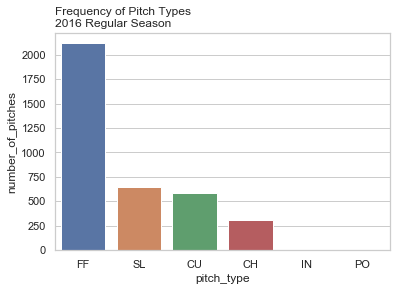

In [15]:
sns.barplot(x = jv.pivot_table(index = 'pitch_type', values = 'batter', aggfunc = len).sort_values(by = 'batter', ascending = False).index, 
            y = 'batter',
            data = jv.pivot_table(index = 'pitch_type', values = 'batter', aggfunc = len).sort_values(by = 'batter', ascending = False))
plt.title('Frequency of Pitch Types\n2016 Regular Season', loc = 'left')
plt.ylabel('number_of_pitches');

He throws his four seamer (FF) over 50% of the time. JV is known as a power pitcher so this makes sense. Before this plot, I thought that perhaps Statcast wrongly classified some of his pitches as pitch outs and intentional balls, but the fact that the sum total of them is 5 reassures me.   

Now let's move into analyzing something JV is well known for: his strikeouts. First, we have to create a strikeout column. Let's iterate over the ``events`` variable and create a binary ``strikeout`` column.

In [16]:
strikeout = []
for k in range(0, len(jv.events)):
    if jv.events[k] == 'strikeout':
        strikeout.append(1)
    else:
        strikeout.append(0)

In [17]:
jv['strikeout'] = strikeout

In [18]:
jv.groupby(['pitch_type']).sum().strikeout.sort_values(ascending = False)

pitch_type
FF    138
SL     52
CU     39
CH     23
PO      0
IN      0
Name: strikeout, dtype: int64

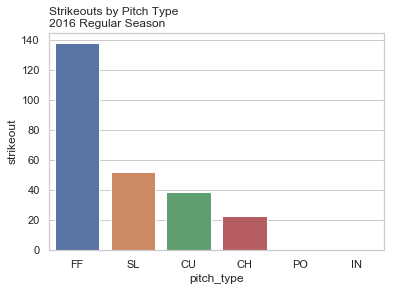

In [19]:
sns.barplot(x = jv.groupby(['pitch_type']).sum().strikeout.sort_values(ascending = False).index, 
            y = 'strikeout',
            data = jv.groupby(['pitch_type']).sum().sort_values(by = 'strikeout', ascending = False))
plt.title('Strikeouts by Pitch Type\n2016 Regular Season', loc = 'left');

It is clear that JV's put-away pitch is his four-seamer by far. He also goes to his slider quite often.  

Let's plot his strike zone on his strikeout pitches.

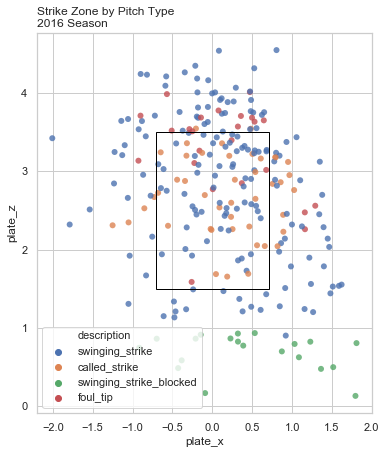

In [20]:
plt.figure(figsize=(6, 7))
sns.scatterplot(x = 'plate_x', y = 'plate_z', hue = 'description', 
                data = jv[jv['strikeout'] == 1], 
                alpha = 0.8, linewidth = 0).add_patch(patches.Rectangle((-0.71,1.5),1.42,2, fill = False, edgecolor = 'black'))
plt.title('Strike Zone by Pitch Type\n2016 Season', loc = 'left');

What's better: a called strikeout or a swinging strikeout? That is a subjective question, but it is clear that most of his strikeouts are swinging strikeouts. The red points indicate foul tips, which is odd, aren't we plotting strikeouts? Given the extremely low number of foul tips, these are foul tips into the catcher's mitt and thus, a strikeout.  

But we do not need to guess, let's check the data!

In [21]:
jv[(jv['strikeout'] == 1) & (jv['description'] == 'foul_tip')].des

172        Abraham Almonte strikes out on a foul tip.  
206       Michael Martinez strikes out on a foul tip.  
263             Max Kepler strikes out on a foul tip.  
460           Caleb Joseph strikes out on a foul tip.  
466           Hyun Soo Kim strikes out on a foul tip.  
577             Adam Eaton strikes out on a foul tip.  
650             Adam Eaton strikes out on a foul tip.  
731         J.  B.   Shuck strikes out on a foul tip.  
919           Mookie Betts strikes out on a foul tip.  
937      Andrew Benintendi strikes out on a foul tip.  
1243         Matt Reynolds strikes out on a foul tip.  
1295         Kelly Johnson strikes out on a foul tip.  
1694          Jarrod Dyson strikes out on a foul tip.  
1773        Russell Martin strikes out on a foul tip.  
1906    Steven Souza Jr.   strikes out on a foul tip.  
2206      Cheslor Cuthbert strikes out on a foul tip.  
2452        Avisail Garcia strikes out on a foul tip.  
2597         Tyler Goeddel strikes out on a foul

Indeed, our assumptions are proved correct! Funny enough, Adam Eaton and Tyler Naquin both foul tipped into the glove twice in 2016.  

Let's move on to other views of JV's strikeouts.

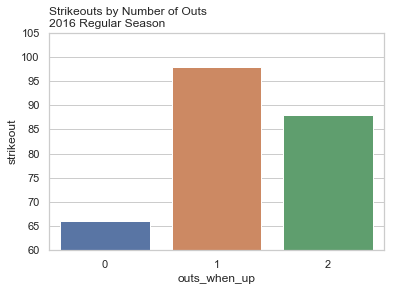

In [22]:
sns.barplot(x = jv.groupby(['outs_when_up']).sum().strikeout.index, 
            y = 'strikeout',
            data = jv.groupby(['outs_when_up']).sum())
plt.title('Strikeouts by Number of Outs\n2016 Regular Season', loc = 'left')
plt.ylim(60, 105);

It seems that JV is much more likely to record a strikeout when there is 1 or 2 outs already. This is likely a result of pitch strategy. For example, if there are runners at the corners with 1 out, a strikeout stops the runs from scoring; however, a deep fly ball will likely result in the runner on third scoring.  

Let's compare the release point of his various pitches.

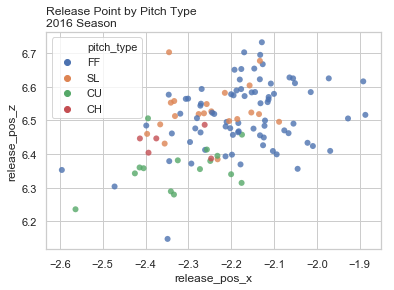

In [23]:
sns.scatterplot(x = 'release_pos_x', y = 'release_pos_z', hue = 'pitch_type', 
                data = jv[(jv['game_date'] == '2016-09-05') & (jv['pitch_type'] != 'IN') & (jv['pitch_type'] != 'PO')], 
                alpha = 0.8, linewidth = 0)
plt.title('Release Point by Pitch Type\n2016 Season', loc = 'left');

The release points of his pitches all are somewhat similar. This makes it especially taxing on the batters, because his release point does not give any significant information about the forthcoming pitch. Perhaps you could say that his four seamer is more upper right and his curveball is more lower left, but they all tend to blend together overall.  

Here is a table of his average release point by pitch:

In [24]:
jv[(jv['pitch_type'] != 'IN') & (jv['pitch_type'] != 'PO')].groupby('pitch_type').mean().iloc[:,1:3]

,release_pos_x,release_pos_z
pitch_type,,
CH,-2.471801,6.375891
CU,-2.411991,6.412988
FF,-2.266865,6.512747
SL,-2.338494,6.497765


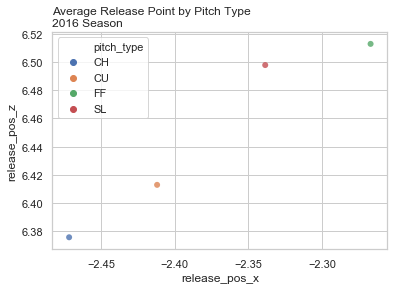

In [25]:
sns.scatterplot(x = 'release_pos_x', 
                y = 'release_pos_z', 
                hue = jv[(jv['pitch_type'] != 'IN') & (jv['pitch_type'] != 'PO')].groupby('pitch_type').mean().iloc[:,1:3].index, 
                data = jv[(jv['pitch_type'] != 'IN') & (jv['pitch_type'] != 'PO')].groupby('pitch_type').mean().iloc[:,1:3], 
                alpha = 0.8, linewidth = 0)
plt.title('Average Release Point by Pitch Type\n2016 Season', loc = 'left');

On an aggregate level, it is clear that JV has differing release points for each pitch type. His 4SFB and slider are in the upper right, while his changeup and curve are in the lower left. This could be advantageous information for batters.

Let's take a deep dive into JV's *stuff*. But first, what exactly is stuff?  

Stuff is commonly used by players, managers, and analysts to describe how a pitcher pitches. An example is "He has really good stuff". It has a vague meaning and yet everyone seems to know what it means. Stuff is what makes a pitch hard to hit: erratic flight path, spin rate, and speed. For this analysis, stuff includes velocity, spin rate, and release extension. 

Let's start with velocity.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


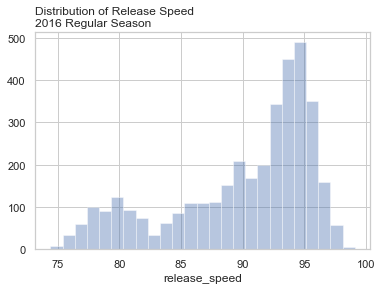

In [26]:
sns.distplot(jv.release_speed, kde = False)
plt.title('Distribution of Release Speed\n2016 Regular Season', loc = 'left');

Just looking at this histogram alone shows that JV likes his fastball quite a bit. Let's examine this further.

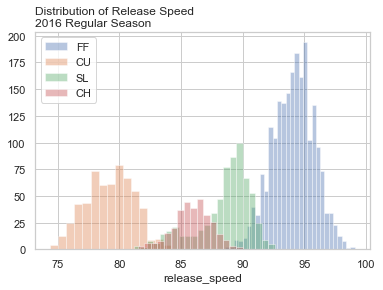

In [27]:
sns.distplot(jv[jv['pitch_type'] == 'FF'].release_speed, kde = False)
sns.distplot(jv[jv['pitch_type'] == 'CU'].release_speed, kde = False)
sns.distplot(jv[jv['pitch_type'] == 'SL'].release_speed, kde = False)
sns.distplot(jv[jv['pitch_type'] == 'CH'].release_speed, kde = False)
plt.legend(['FF','CU', 'SL', 'CH'], loc = 'upper left')
plt.title('Distribution of Release Speed\n2016 Regular Season', loc = 'left');

Breaking down the larger histogram into these segmented ones by pitch type makes the analysis much more meaningful. It shows the frequency of each pitch and its velocity distribution. It appears that each individual distribution by pitch type is somehwat normally distributed, but the overall distribution is not; it is skewed left.

In [28]:
jv.release_speed.describe()

count    3668.000000
mean       90.024100
std         5.760789
min        74.400000
25%        86.600000
50%        92.200000
75%        94.500000
max        99.100000
Name: release_speed, dtype: float64

It looks like JV never hit 100 in 2016, but he got very close.

Statcast incorporates something called ``effective_speed``, which is the perceived pitch speed to the batter. It incorporates velocity, spin rate, and release extension. Let's see how it compares to recorded speed.

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


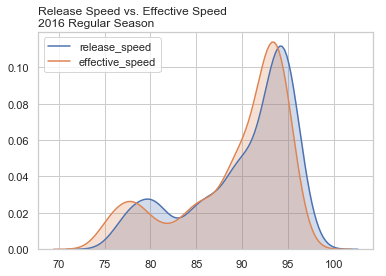

In [29]:
sns.kdeplot(jv.release_speed, shade = True)
sns.kdeplot(jv.effective_speed, shade = True)
plt.title('Release Speed vs. Effective Speed\n2016 Regular Season', loc = 'left');

It appears that generally ``effective_speed`` is shifted slightly to the left of ``release_speed``, meaning that batters generally perceive JV's pitches quicker than a radar gun! This is very impressive feat and why they are MLB players and not average joes.

In [30]:
print('Difference:\t',(jv.release_speed - jv.effective_speed).mean())

Difference:	 0.7802415207877452


On average, the release speed is 0.78 MPH faster effective velocity.  

Let's look at JV's average speed for each pitch.

In [31]:
jv_velocity = jv.groupby(['pitch_type']).mean().release_speed.sort_values(ascending = False)
jv_velocity = jv_velocity.reset_index()
jv_velocity

,pitch_type,release_speed
0,FF,94.079698
1,SL,88.516283
2,PO,86.000000
3,CH,85.909968
4,IN,79.875000
5,CU,79.245283


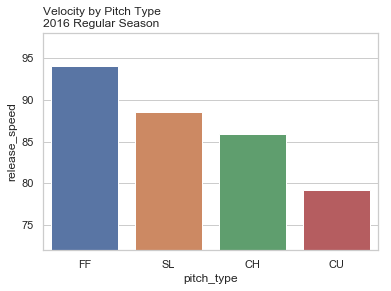

In [32]:
sns.barplot(x = 'pitch_type', 
            y = 'release_speed',
            data = jv_velocity[(jv_velocity['pitch_type'] != 'PO') & (jv_velocity['pitch_type'] != 'IN')])
plt.title('Velocity by Pitch Type\n2016 Regular Season', loc = 'left')
plt.ylim(72, 98);

This follows the results of the histogram and pitch count per pitch.

Now let's conduct a similar analysis on another aspect of ``effective_speed``, spin rate.

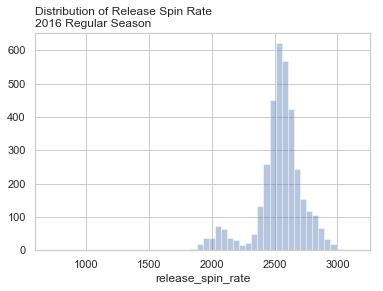

In [33]:
sns.distplot(jv.release_spin_rate.dropna(), kde = False)
plt.title('Distribution of Release Spin Rate\n2016 Regular Season', loc = 'left');

The variance of this distribution appears to much less than that of speed. Could this be the scale distorting the numbers?

In [34]:
jv.release_spin_rate.describe()

count    3601.000000
mean     2532.431824
std       203.139566
min       718.000000
25%      2475.000000
50%      2553.000000
75%      2636.000000
max      3138.000000
Name: release_spin_rate, dtype: float64

The standard deviation of spin rate is actually greater than velocity. This has to do with the units of the value, so let's normalize both of them using the mean.

In [35]:
print('Velocity:\t', jv.release_speed.std()/jv.release_speed.mean())
print('Spin rate:\t', jv.release_spin_rate.std()/jv.release_spin_rate.mean())

Velocity:	 0.06399163554006161
Spin rate:	 0.08021521600172683


When normalized by the mean, it appears that spin rate is actually more volatile for JV. This means that the scale was distorting the appearance of the distribution.

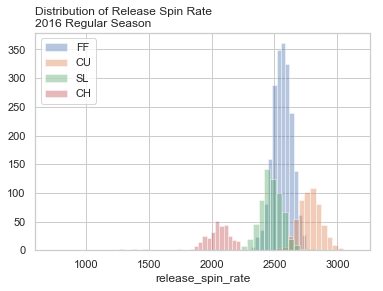

In [36]:
sns.distplot(jv[jv['pitch_type'] == 'FF'].release_spin_rate.dropna(), kde = False)
sns.distplot(jv[jv['pitch_type'] == 'CU'].release_spin_rate.dropna(), kde = False)
sns.distplot(jv[jv['pitch_type'] == 'SL'].release_spin_rate.dropna(), kde = False)
sns.distplot(jv[jv['pitch_type'] == 'CH'].release_spin_rate.dropna(), kde = False)
plt.legend(['FF','CU', 'SL', 'CH'], loc = 'upper left')
plt.title('Distribution of Release Spin Rate\n2016 Regular Season', loc = 'left');

Again, breaking the histogram down by the individual pitch types adds a new dimension to the analysis. The distributions of spin rate by pitch type are somewhat normal, while the overall distribution is less normal. 

Might there be some kind of relationship between velocity and spin rate?

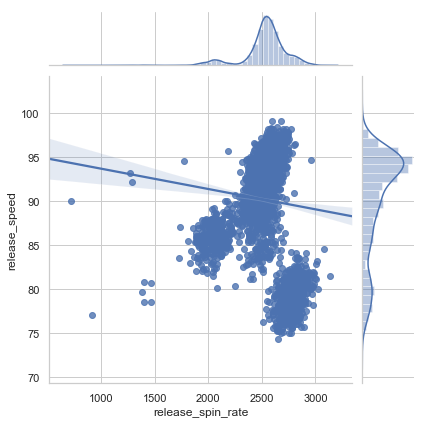

In [37]:
sns.jointplot('release_spin_rate', 'release_speed', 
              data = jv[(jv['pitch_type'] != 'PO') & (jv['pitch_type'] != 'IN')], 
              kind = 'reg');

It seems overall there is a slightly negative relationship between release speed and release spin rate. This makes sense because of JV's curveball, which has an average speed of 79 mph and an average spin rate of almost 2,800 rpm. Let's confirm this.

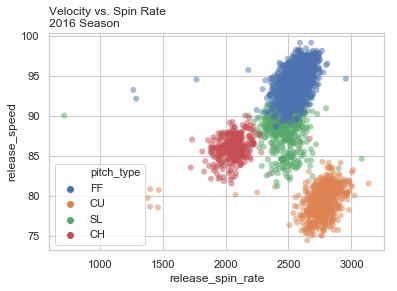

In [38]:
sns.scatterplot(x = 'release_spin_rate', y = 'release_speed', hue = 'pitch_type', 
                data = jv[(jv['pitch_type'] != 'PO') & (jv['pitch_type'] != 'IN')], 
                alpha = 0.5, linewidth = 0)
plt.title('Velocity vs. Spin Rate\n2016 Season', loc = 'left');

It appears that, aside from the curveball, release speed has a positive relationship with spin rate. As a side note, this is a nice cluster analysis. It appears that velocity and spin rate have a lot to do with classifying pitch type. The four seamer and slider do have some noticebale overlap though.  


Let's see how this plot looks without the curve.

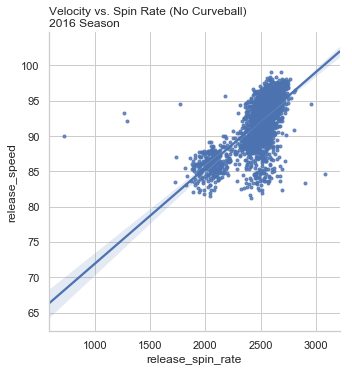

In [39]:
sns.lmplot('release_spin_rate', 'release_speed', 
           data = jv[(jv['pitch_type'] != 'PO') & (jv['pitch_type'] != 'IN') & (jv['pitch_type'] != 'CU')],
          markers = '.')
plt.title('Velocity vs. Spin Rate (No Curveball)\n2016 Season', loc = 'left');

Taking out the his curveball, spin rate and velocity are very strongly correlated.  

Now let's move to ``release_extension``.

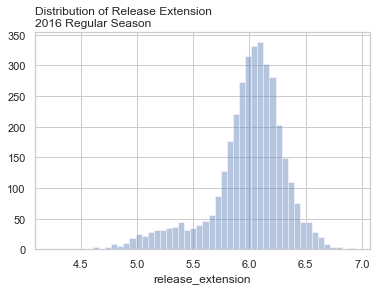

In [40]:
sns.distplot(jv.release_extension.dropna(), kde = False)
plt.title('Distribution of Release Extension\n2016 Regular Season', loc = 'left');

His release extension appears somewhat normal, perhaps skewed to the left. I have a hunch if we break it down by individual pitch types those histograms will be normal.

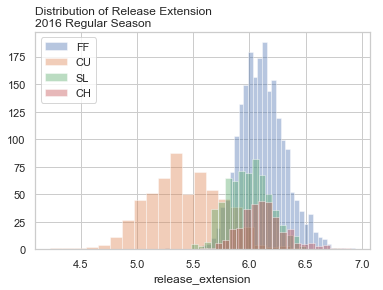

In [41]:
sns.distplot(jv[jv['pitch_type'] == 'FF'].release_extension.dropna(), kde = False)
sns.distplot(jv[jv['pitch_type'] == 'CU'].release_extension.dropna(), kde = False)
sns.distplot(jv[jv['pitch_type'] == 'SL'].release_extension.dropna(), kde = False)
sns.distplot(jv[jv['pitch_type'] == 'CH'].release_extension.dropna(), kde = False)
plt.legend(['FF','CU', 'SL', 'CH'], loc = 'upper left')
plt.title('Distribution of Release Extension\n2016 Regular Season', loc = 'left');

Yep, suspicions confirmed. Let's see if he tends to extend more for certain pitches.

In [42]:
jv_ext = jv.groupby(['pitch_type']).mean().release_extension.sort_values(ascending = False).reset_index()
jv_ext

,pitch_type,release_extension
0,CH,6.125036
1,FF,6.115579
2,SL,5.990358
3,PO,5.787000
4,CU,5.422415
5,IN,5.037250


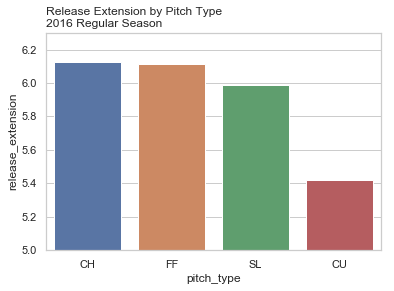

In [43]:
sns.barplot(x = 'pitch_type', 
            y = 'release_extension',
            data = jv_ext[(jv_ext['pitch_type'] != 'PO') & (jv_ext['pitch_type'] != 'IN')])
plt.title('Release Extension by Pitch Type\n2016 Regular Season', loc = 'left')
plt.ylim(5, 6.3);

His average release extension is almost identical for his fastball and changeup. This is very a good trait for a pitcher to have because it is important for the changeup to appear as if it's a fastball until the last possible microsecond. His curveball has a noticeably shorter extension than his other pitches, which may tip off certain eagle-eyed batters.

I wonder what impact this extension has on his strikeouts? Since this is a continuous variable, a barplot would not be meaningful; therefore, let's bin the data by every 0.5, starting from the min and going to the max. First, let's find out what the max/min is.

In [44]:
jv.release_extension.describe()

count    3656.000000
mean        5.982377
std         0.336690
min         4.230000
25%         5.858000
50%         6.035000
75%         6.191000
max         6.937000
Name: release_extension, dtype: float64

In [45]:
bins = []

for k in range(0, len(jv.release_extension)):
    if jv.release_extension[k] >= 4 and jv.release_extension[k] < 4.5:
        bins.append(4)
    elif jv.release_extension[k] >= 4.5 and jv.release_extension[k] < 5:
        bins.append(4.5)
    elif jv.release_extension[k] >= 5 and jv.release_extension[k] < 5.5:
        bins.append(5)
    elif jv.release_extension[k] >= 5.5 and jv.release_extension[k] < 6:
        bins.append(5.5)
    elif jv.release_extension[k] >= 6 and jv.release_extension[k] < 6.5:
        bins.append(6)
    else:
        bins.append(6.5)

jv['extension_bins'] = bins

In [46]:
jv_bins = jv.groupby('extension_bins').sum().strikeout.reset_index()
jv_bins

,extension_bins,strikeout
0,4.0,0
1,4.5,4
2,5.0,13
3,5.5,94
4,6.0,133
5,6.5,8


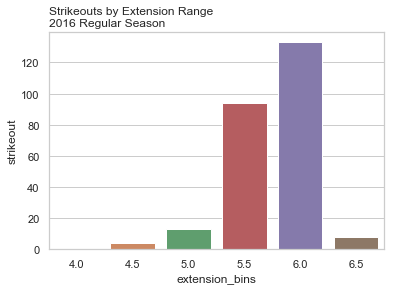

In [47]:
sns.barplot(x = 'extension_bins', 
            y = 'strikeout',
            data = jv_bins)
plt.title('Strikeouts by Extension Range\n2016 Regular Season', loc = 'left');

It appears that generally as release extension increases so does the likelihood of strikeouts. A greater release extension increases the effective speed, so this plot makes sense. One exception is the range greater than 6.5, although this is likely because of a small sample size. 

In [48]:
bin_df = jv.groupby('extension_bins') \
                .agg({'strikeout':'sum', 'game_date':'count'}) \
                .rename(columns={'strikeout':'strikeouts','game_date':'pitches'}) \
                .reset_index()
       
bin_df['pitches_per_k'] = bin_df['pitches'] / bin_df['strikeouts']
bin_df

,extension_bins,strikeouts,pitches,pitches_per_k
0,4.0,0,3,inf
1,4.5,4,53,13.250000
2,5.0,13,293,22.538462
3,5.5,94,1253,13.329787
4,6.0,133,1942,14.601504
5,6.5,8,124,15.500000


It appears that our initial assumption was correct; he only threw 124 pitches greater or equal to 6.5 extension. Most of his pitches are between 5.5 and 6.5 in extension range.

## 2016 AL Cy Young Award Revisited

Rick Porcello was the winner of the AL Cy Young award in 2016. While Porcello did have a great season, I think that JV got snubbed for the Cy Young. Porcello plays in a much larger market than JV; the Red Sox are the second most popular team in the MLB. This clearly played a factor. And as noted before, I'm sure their pitching records played a much more prominent role in the decision than they should have.

### Technical Performance

Let's create a dataframe of just Rick Porcello pitch-by-pitch data for the 2016 regular season, since the Cy Young is only based on regular season performance. This part of the analysis will consider aggregated pitch level data based on technical aspects, like velocity and spin rate. 

Let's start by creating a merged dataframe of the two pitchers.  

In [49]:
# create dataframe for Rick Porcello
player_id_rp = pybaseball.playerid_lookup('Porcello', first = 'Rick')
rp_id = player_id_rp['key_mlbam'][0]
rp = pybaseball.statcast_pitcher(start_dt = '2016-04-09', end_dt = '2016-09-30', player_id = rp_id)

# mirror jv dataframe structure
rp.game_date = pd.to_datetime(rp.game_date)
rp.zone = rp.zone.astype('object')

strikeout_rp = []
for k in range(0, len(rp.events)):
    if rp.events[k] == 'strikeout':
        strikeout_rp.append(1)
    else:
        strikeout_rp.append(0)
rp['strikeout'] = strikeout_rp

# drop missing column for rp
jv = jv.drop(columns = ['extension_bins'])

# create merged dataframe
cy = jv.merge(rp, how = 'outer')

Gathering player lookup table. This may take a moment.
Gathering Player Data


Let's compare their strikeout totals.

In [50]:
print('Strikeouts')
print('Verlander:\t', jv.strikeout.sum())
print('Porcello:\t', rp.strikeout.sum())

Strikeouts
Verlander:	 252
Porcello:	 188


Verlander clearly has the edge here; let's see how this is distributed among their pitch types.

In [51]:
k_df = cy.groupby(['player_name', 'pitch_type']) \
                .agg({'strikeout':'sum'}) \
                .rename(columns = {'strikeout':'strikeouts'}) \
                .reset_index()
k_df

,player_name,pitch_type,strikeouts
0,Justin Verlander,CH,23
1,Justin Verlander,CU,39
2,Justin Verlander,FF,138
3,Justin Verlander,IN,0
4,Justin Verlander,PO,0
5,Justin Verlander,SL,52
6,Rick Porcello,CH,24
7,Rick Porcello,CU,10
8,Rick Porcello,FF,66
9,Rick Porcello,FT,56


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


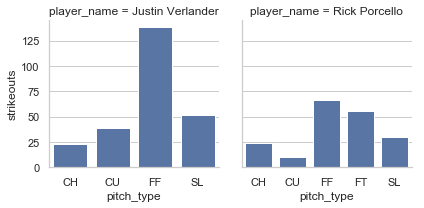

In [52]:
g = sns.FacetGrid(k_df[(k_df['pitch_type'] != 'PO') & (k_df['pitch_type'] != 'IN')], 
                  col = 'player_name', sharex = False)
g.map(sns.barplot,'pitch_type','strikeouts');

Verlander has more strikeouts with his four seamer than both of Porcello's fastballs combined. By this analysis, JV's curve is much deadlier than Porcello's.  

Let's move to a key measure of stuff: spin rate.

In [53]:
spin_df = cy.groupby(['player_name', 'pitch_type']) \
                .agg({'release_spin_rate':'mean'}) \
                .rename(columns = {'release_spin_rate':'average_spin_rate'}) \
                .reset_index()
spin_df

,player_name,pitch_type,average_spin_rate
0,Justin Verlander,CH,2058.622150
1,Justin Verlander,CU,2763.353571
2,Justin Verlander,FF,2558.475511
3,Justin Verlander,IN,2169.500000
4,Justin Verlander,PO,2255.000000
5,Justin Verlander,SL,2473.490415
6,Rick Porcello,CH,1688.209713
7,Rick Porcello,CU,2801.347921
8,Rick Porcello,FF,2447.253711
9,Rick Porcello,FT,2365.236863


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


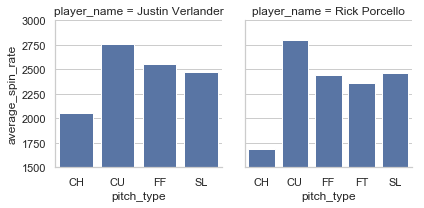

In [54]:
p = sns.FacetGrid(spin_df[(spin_df['pitch_type'] != 'PO') & (spin_df['pitch_type'] != 'IN')], 
                  col = 'player_name', sharex = False)
p.map(sns.barplot,'pitch_type','average_spin_rate')
plt.ylim(1500,3000);

They are pretty equal here. JV has a slight edge on the four seamer while Porcello has the edge on the curve. Their sliders has roughly the same spin rate as well. The only noticeble difference is with the changeup, where JV's has considerably greater rpm.  

Let's move to the next key measure of stuff, velocity.

In [55]:
vel_df = cy.groupby(['player_name', 'pitch_type']) \
                .agg({'release_speed':'mean'}) \
                .rename(columns = {'release_speed':'average_velocity'}) \
                .reset_index()
vel_df

,player_name,pitch_type,average_velocity
0,Justin Verlander,CH,85.909968
1,Justin Verlander,CU,79.245283
2,Justin Verlander,FF,94.079698
3,Justin Verlander,IN,79.875000
4,Justin Verlander,PO,86.000000
5,Justin Verlander,SL,88.516283
6,Rick Porcello,CH,81.398899
7,Rick Porcello,CU,74.160171
8,Rick Porcello,FF,92.191223
9,Rick Porcello,FT,90.086180


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


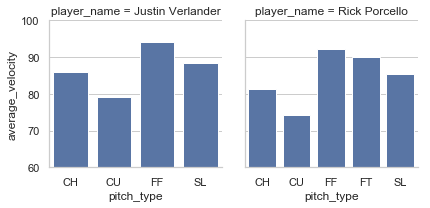

In [56]:
f = sns.FacetGrid(vel_df[(vel_df['pitch_type'] != 'PO') & (vel_df['pitch_type'] != 'IN')], 
                  col = 'player_name', sharex = False)
f.map(sns.barplot,'pitch_type','average_velocity')
plt.ylim(60,100);

The edge goes to JV for all of his four pitches, if only slightly in some cases. 

It is hard to discern exactly who has the edge based on velocity and spin rate alone because different combinations of the two can have different effects. A lower velocity on a curveball is not necessarily a good or bad thing, it just depends. One thing this tells me is that they are very similar in terms of speed and velocity.

The X factor, or rather *K* factor (if you'll indulge me), is strikeouts. JV has 64 more strikeouts than Porcello, specifically with his four seamer and curveball. This indicates that JV's versions of these pitches are more elite.

### Season Performance Analysis

Let's move to considering results-based measures of pitching performance, not just technique alone. This includes game logs obtained from Baseball-Reference, for both [Verlander](https://www.baseball-reference.com/players/gl.fcgi?id=verlaju01&t=p&year=2016) and [Porcello](https://www.baseball-reference.com/players/gl.fcgi?id=porceri01&t=p&year=2016).  

Let's create two dataframes for each of them and then merge them.

In [57]:
season_jv = pd.read_csv('data/season_jv.csv')
season_rp = pd.read_csv('data/season_rp.csv')

# create column for player name
season_jv['player_name'] = ['Verlander' for i in season_jv.ERA]
season_rp['player_name'] = ['Porcello' for i in season_rp.ERA]

In [58]:
# create binary win-loss column - JV
season_jv['decision'] = season_jv.Dec.str[:1]

wins_jv = []

for k in season_jv.decision:
    if k == 'W':
        wins_jv.append(1)
    else:
        wins_jv.append(0)

season_jv['win'] = wins_jv

In [59]:
# create binary win-loss column - RP
season_rp['decision'] = season_rp.Dec.str[:1]

wins_rp = []

for k in season_rp.decision:
    if k == 'W':
        wins_rp.append(1)
    else:
        wins_rp.append(0)

season_rp['win'] = wins_rp

In [60]:
# create merged dataframe
season = season_jv.append(season_rp)
season.head(10)

,Rk,Gcar,Gtm,Date,Tm,home_away,Opp,Rslt,Inngs,Dec,...,aLI,WPA,RE24,DFS(DK),DFS(FD),Entered,Exited,player_name,decision,win
0,1,319,1,Apr 5,DET,@,MIA,W8-7,GS-6,NaN,...,0.61,0.057,-0.24,NaN,NaN,1b start a 1,6b 3 out a2,Verlander,NaN,0
1,2,320,5,Apr 11,DET,NaN,PIT,L4-7,GS-5,L(0-1),...,0.89,-0.318,-3.66,NaN,NaN,1t start tie,5t 1-3 1 out d4,Verlander,L,0
2,3,321,10,Apr 16,DET,@,HOU,W5-3,GS-6,W(1-1),...,0.82,-0.011,-0.13,NaN,NaN,1b start tie,6b 3 out a1,Verlander,W,1
3,4,322,15,Apr 22,DET,NaN,CLE,L1-2,GS-7,L(1-2),...,0.84,0.063,1.56,NaN,NaN,1t start tie,7t 3 out d1,Verlander,L,0
4,5,323,20,Apr 27,DET,NaN,OAK,W9-4,GS-7,W(2-2),...,0.73,0.164,0.36,NaN,NaN,1t start tie,7t 1-3 1 out a6,Verlander,W,1
5,6,324,25,May 3,DET,@,CLE,L3-7,GS-5,L(2-3),...,0.61,-0.348,-4.23,NaN,NaN,1b start tie,5b 3 out d5,Verlander,L,0
6,7,325,30,May 8,DET,NaN,TEX,L3-8,GS-7,NaN,...,1.10,0.409,3.56,NaN,NaN,1t start tie,7t 3 out a2,Verlander,NaN,0
7,8,326,35,May 13,DET,@,BAL,L0-1,CG(8),L(2-4),...,0.91,0.246,3.14,NaN,NaN,1b start tie,8b 3 out d1,Verlander,L,0
8,9,327,40,May 18,DET,NaN,MIN,W6-3,GS-8,W(3-4),...,0.81,0.259,2.14,NaN,NaN,1t start tie,8t 12- 1 out a5,Verlander,W,1
9,10,328,45,May 24,DET,NaN,PHI,W3-1,GS-8,W(4-4),...,0.96,0.461,4.06,NaN,NaN,1t start tie,8t 3 out a3,Verlander,W,1


In [61]:
season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 32
Data columns (total 53 columns):
Rk             67 non-null int64
Gcar           67 non-null int64
Gtm            67 non-null int64
Date           67 non-null object
Tm             67 non-null object
home_away      32 non-null object
Opp            67 non-null object
Rslt           67 non-null object
Inngs          67 non-null object
Dec            51 non-null object
DR             67 non-null int64
IP             67 non-null float64
H              67 non-null int64
R              67 non-null int64
ER             67 non-null int64
BB             67 non-null int64
SO             67 non-null int64
HR             67 non-null int64
HBP            67 non-null int64
ERA            67 non-null float64
BF             67 non-null int64
Pit            67 non-null int64
Str            67 non-null int64
StL            67 non-null int64
StS            67 non-null int64
GB             67 non-null int64
FB             67 non-null i

Let's analyze the three tenets of the Pitching Triple Crown: ERA, wins, and strikeouts. First up, ERA.

In [62]:
print('ERA')
print('Verlander:\t', (season_jv.ER.sum() / season_jv.IP.sum()) * 9)
print('Porcello:\t', (season_rp.ER.sum() / season_rp.IP.sum()) * 9)

ERA
Verlander:	 3.0439238652997007
Porcello:	 3.1479820627802693


Again, JV and Porcello are quite close in this metric as well, but JV has a slight edge here.

In [63]:
print('Wins')
print('Verlander:\t', (season_jv.win.sum()))
print('Porcello:\t', (season_rp.win.sum()))

Wins
Verlander:	 16
Porcello:	 22


Porcello has broken 20 wins, which is considered significant in the baseball world. Porcello has the edge here, but...  

Wins are an outdated statistic. They depend on the performance of the entire team, not just the individual pitcher. If a pitcher gives up 2 runs over 9 innings, but doesn't get the run support needed to win, they are recorded a loss. This is considered a good start, but they still lost the decision. Doesn't seem like an accurate metric for pitcher value.

Let's look at *quality starts*. To qualify as a quality start, a pitcher must have no more than 3 earned runs and gone at least 6.0 innings. This is a more accurate measure of a *good* outing.

In [64]:
print('Quality Starts')
print('Verlander:\t', len(season_jv[(season_jv['ER'] <= 3) & (season_jv['IP'] >= 6.0)]))
print('Porcello:\t', len(season_rp[(season_rp['ER'] <= 3) & (season_rp['IP'] >= 6.0)]))

Quality Starts
Verlander:	 27
Porcello:	 26


At the very least the two pitchers perform equally in terms of quality starts. This takes the impact of team offense out of the equation.

Another way to look at quality starts is *high quality starts*, which requires less than or equal to 3 earned runs and at least 7.0 innings pitched.

In [65]:
print('High Quality Starts')
print('Verlander:\t', len(season_jv[(season_jv['ER'] <= 3) & (season_jv['IP'] >= 7.0)]))
print('Porcello:\t', len(season_rp[(season_rp['ER'] <= 3) & (season_rp['IP'] >= 7.0)]))

High Quality Starts
Verlander:	 19
Porcello:	 16


Verlander has a more pronounced advantage here. This seems to negate the win category for Porcello.  

Additionally, JV had just [4.05](https://www.baseball-reference.com/players/gl.fcgi?id=verlaju01&t=p&year=2016) average run support in his appearances while Porcello had [6.83](https://www.baseball-reference.com/players/gl.fcgi?id=porceri01&t=p&year=2016). Let's see the impact this might have.

In [66]:
print('Losses or No Decisions with 2 Runs or Less Allowed')
print('Verlander:\t', len(season_jv[(season_jv['R'] <= 2) & (season_jv['win'] == 0)]))
print('Porcello:\t', len(season_rp[(season_rp['R'] <= 2) & (season_rp['win'] == 0)]))

Losses or No Decisions with 2 Runs or Less Allowed
Verlander:	 11
Porcello:	 1


Verlander has a startling **11** losses or no decisions where at most 2 runs were allowed! Porcello only has 1. This means that the added run support could have made quite the difference to Verlander's record.

In [67]:
print('Strikeouts')
print('Verlander:\t', season_jv.SO.sum())
print('Porcello:\t', season_rp.SO.sum())

Strikeouts
Verlander:	 254
Porcello:	 189


These numbers are slightly different than the ones obtained from ``pybaseball``. I consider these to be the official strikeout totals though, because they are a given field and not calculated. In any case, the result is the same: JV has a large advantage in terms of strikeouts.

So, we determined they were roughly equal in ERA (even though JV's was slightly better), wins are an irrelevent stat so they are almost identical in quality starts, and JV has significantly more strikeouts. Wouldn't this mean that JV should have won the Cy Young?  

Let's move on to other measure of pitching performance.

In [68]:
print('WHIP')
print('Verlander:\t', (season_jv.H.sum() + season_jv.BB.sum()) / season_jv.IP.sum())
print('Porcello:\t', (season_rp.H.sum() + season_rp.BB.sum()) / season_rp.IP.sum())

WHIP
Verlander:	 1.0014641288431916
Porcello:	 1.0089686098654709


WHIP is walks plus hits per inning pitched. The two former Tigers are almost exactly equal here, only allowing about one walk or hit each inning.

In [69]:
print('Mean IP')
print('Verlander:\t', season_jv.IP.mean())
print('Porcello:\t', season_rp.IP.mean())

Mean IP
Verlander:	 6.696078431373529
Porcello:	 6.757575757575758


Porcello went slightly deeper into games than JV, but just barely. They both go about 6.2 inning on average though.  

Let's look at pitch count per game.

In [70]:
print('Mean IP')
print('Verlander:\t', season_jv.Pit.mean())
print('Porcello:\t', season_rp.Pit.mean())

Mean IP
Verlander:	 107.88235294117646
Porcello:	 103.33333333333333


Verlander threw more pitches per outing, about 4.5 more actually. Let's look at the relationship between these two variables.

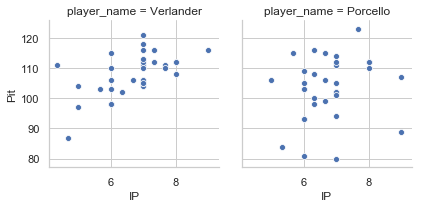

In [71]:
k = sns.FacetGrid(season, 
                  col = 'player_name')
k.map(sns.scatterplot,'IP','Pit');

It looks like JV has a clear positive relationship between IP and number of pitches, while Porcello doesn't seem to have an obvious one. Let's look at this on an aggregate level.

In [72]:
ip_pit = season.groupby(['player_name', 'IP']).Pit.mean().reset_index()
ip_pit

,player_name,IP,Pit
0,Porcello,5.000000,106.000000
1,Porcello,5.333333,84.000000
2,Porcello,5.666667,115.000000
3,Porcello,6.000000,98.142857
4,Porcello,6.333333,105.500000
5,Porcello,6.666667,106.666667
6,Porcello,7.000000,102.300000
7,Porcello,7.666667,123.000000
8,Porcello,8.000000,111.333333
9,Porcello,9.000000,98.000000


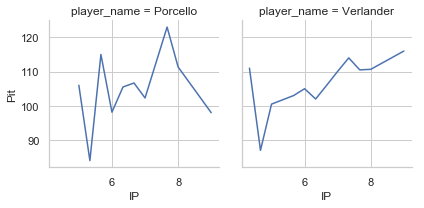

In [73]:
b = sns.FacetGrid(ip_pit, col = 'player_name')
b.map(sns.lineplot,'IP','Pit');

JV throws more pitches the more innings he sees, while Porcello somewhat follows this trend. JV is more of a strikeout pitcher, so high pitch counts are the norm for him. It is impressive that Porcello averages a "Maddux" (< 100 pitches) when he throws a complete game.

## Conclusion

After analyzing both Justin Verlander and Rick Porcello extensively, I believe JV should have been the winner of the 2016 AL Cy Young. Their 2016 seasons were remarkably similar with two major asterisks: strikeouts and wins. JV had the edge in strikeouts while Porcello had the edge in wins; however, after explaining the fallacy of wins as a performance stat for pitching and substituting quality starts instead, they proved to be roughly equal in this respect. The Tigers just did not back up his starts with solid offensive production, which killed his record. The fact that JV had significantly more strikeouts sets him apart for me. JV also had the slight advantage in terms of WHIP and ERA.

Besides wins, other factors resulted in Porcello being awarded the Cy Young, mainly the team he played for. Boston is a huge sports market, and the Red Sox are one of the most recognized names not just in baseball, but in sports altogether. Cy Young voting is done by members of the Baseball Writers' Association of America, which is comprised of local and national sports writers and reporters. You can view an incomplete list of current members [here](https://en.wikipedia.org/wiki/Baseball_Writers%27_Association_of_America#List_of_current_members). Bostonian members were likely to vote for Porcello, while Detroiters would have voted for JV, which would largely cancel out. National members would be more likely to vote for the player with the most press, which would have been Porcello. These people are human and most do not examine the candidates in a logical, analytical manner. This would give historically important stats, like wins, too great a weighting in deciding the winner. In the minds of non-Detroiters, JV was an aging pitcher with diminishing returns, which no doubt contributed to the decision.  

In closing, both pitchers had outstanding seasons in 2016, and the case could be made for either of them, but I believe JV performed better and was more deserving of the award. His performance in the 2016 season, his last in a Tigers uniform, was without doubt elite. It may be overshadowed by his 2017 World Series year, but it deserves recognition just the same.